In [1]:
""" Imaging to understand what happens with opacities and optical depth """

' Imaging to understand what happens with opacities and optical depth '

In [21]:
# Vanilla imports
import numpy as np
import matplotlib.pyplot as plt
import colorcet
import matplotlib.colors as colors

# Chocolate imports
from src.Calculators.ray_maker import ray_maker

# Constants
c = 2.99792458e10 #[cm/s]
h = 6.62607015e-27 #[gcm^2/s]
Kb = 1.380649e-16 #[gcm^2/s^2K]
alpha = 7.5646 * 10**(-15) # radiation density [erg/cm^3K^4]
Rsol_to_cm = 6.957e10

fix = 844

In [3]:
rays_T, rays_den, rays, radii = ray_maker(fix, 6)

/Users/paolamartire/miniconda3/envs/tde_comparison/lib/python3.9/site-packages/numba/core/ir_utils.py:2149: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'observers' of function 'THROUPLE_S_CASTERS'.

For more information visit https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "src/Calculators/legion_of_casters.py", line 12:
@numba.njit
def THROUPLE_S_CASTERS(radii, R,
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))


In [8]:
np.shape(radii/Rsol_to_cm)

(750,)

/var/folders/s6/3n46ppqn3jx7765w8c686c740000gn/T/ipykernel_95039/1636166783.py:1: RuntimeWarning: divide by zero encountered in log10
  logT = np.log10(rays_T)
/var/folders/s6/3n46ppqn3jx7765w8c686c740000gn/T/ipykernel_95039/1636166783.py:2: RuntimeWarning: divide by zero encountered in log10
  logrho = np.log10(rays_den)


Text(0.5, 1.0, 'Density')

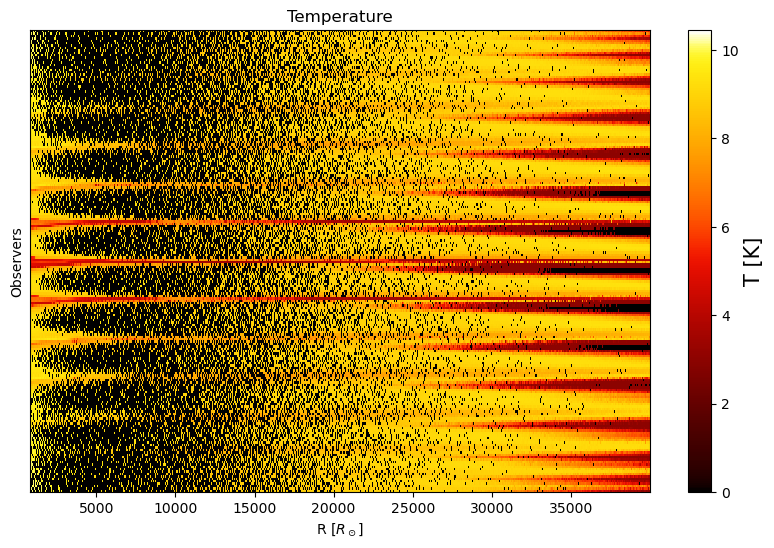

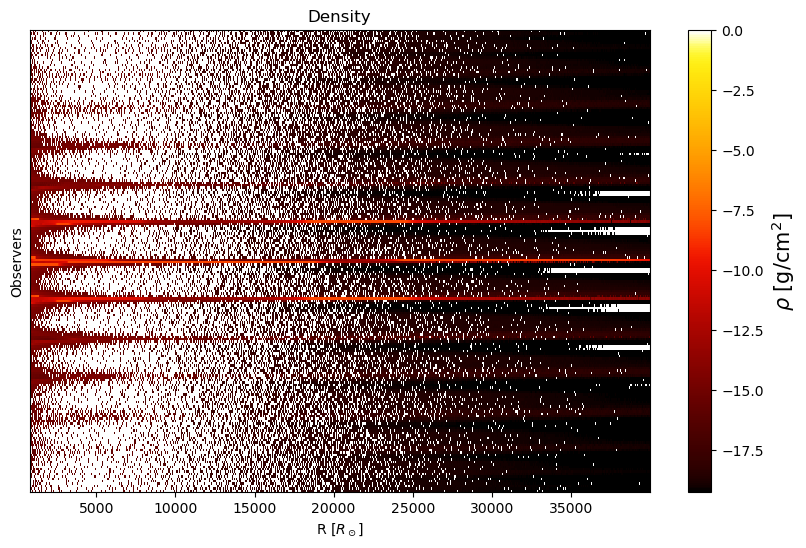

In [22]:
logT = np.log10(rays_T)
logrho = np.log10(rays_den)
logT = np.nan_to_num(logT, neginf = 0)
logrho = np.nan_to_num(logrho, neginf = 0)

plt.figure(figsize = (10,6))
img = plt.pcolormesh(radii/Rsol_to_cm, np.arange(len(rays_T)), logT, cmap = 'cet_fire')
cbar = plt.colorbar(img)
cbar.set_label('T [K]', fontsize = 15)
plt.xlabel('R [$R_\odot$]')
plt.ylabel('Observers')
img.axes.get_yaxis().set_ticks([])
plt.savefig('Paola/T_observers' + str(fix) + '.png')
plt.title('Temperature')

plt.figure(figsize = (10,6))
img = plt.pcolormesh(radii/Rsol_to_cm, np.arange(len(rays_T)), logrho, cmap = 'cet_fire')
cbar = plt.colorbar(img)
cbar.set_label(r'$\rho$ [g/cm$^2$]', fontsize = 15)
plt.xlabel('R [$R_\odot$]')
plt.ylabel('Observers')
img.axes.get_yaxis().set_ticks([])
plt.savefig('Paola/rho_observers' + str(fix) + '.png')
plt.title('Density')